In [1]:
import pandas as pd
import numpy as nm
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib as mpl



C:\Users\Lior birendorf\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


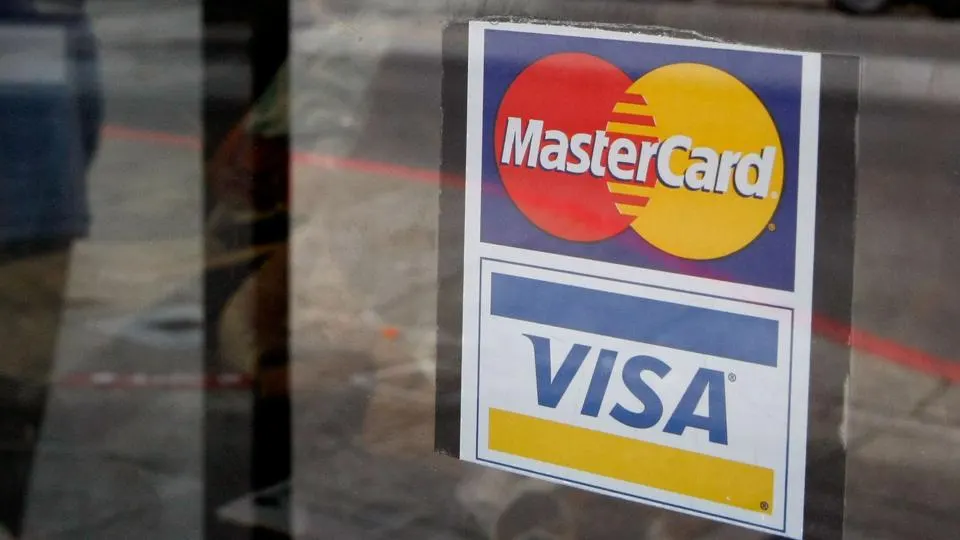

# Project Introduction: Analyzing Visa and Mastercard Stock Performance


In the fast-paced world of finance, informed decision-making is crucial. Investors and financial analysts are constantly seeking insights to guide their choices in the stock market. This data analysis project delves into the historical stock performance of two prominent players in the financial sector: Visa Inc. (NYSE: V) and Mastercard Incorporated (NYSE: MA).

# Project Objective:
The primary objective of this project is to gain a comprehensive understanding of the historical performance of Visa and Mastercard stocks. By analyzing their stock price movements, returns, volatility, and other relevant metrics,In the goal to uncover patterns, trends, and insights that can inform investment decisions. Additionally, this project serves as an opportunity to showcase data analysis skills and demonstrate the ability to extract meaningful insights from financial data.

# Why Visa and Mastercard?
Visa and Mastercard are global leaders in the payments industry, facilitating billions of transactions worldwide. As key players in the financial sector, the performance of their stocks is of great interest to investors and analysts. By examining these companies' historical stock data, I aim to provide valuable insights that can benefit both individual and institutional investors.

I started by collecting historical stock price data for Visa and Mastercard. This data was cleaned and preprocessed to ensure accuracy and consistency. Exploratory Data Analysis (EDA) techniques will be applied to uncover trends, correlations, in the stock price movements.

## What is a Visa card and what are its benefits?
The Visa card is accepted by 44 million establishments across 200 countries.

Here’s a list of the top Visa card benefits:

• Card replacement service if lost or stolen

• Price protection for up to 30 days after making a purchase

• Cash advances on credit cards via the ATM network

• Verified by Visa security protocol 

## What is a Mastercard and what are its benefits?
Mastercardcards are accepted in 210 countries, at over 37 million establishments, and at one million ATMs around the world. Several studies have shown that they offer a lower exchange rate for foreign currencies than alternative providers.

Here are the main Mastercard benefits:

• Emergency card replacement service if lost or stolen

• Price protection for up to 60 days after making a purchase

• Mastercard SecureCode security 

## The differences between Visa and Mastercard

Visa and Mastercard are the world’s best-known credit cards, and it might seem like they’re one and the same. However, there are some major differences.
Before we dive into the differences between Visa and Mastercard, it’s worth explaining what these two companies do. Visa and Mastercard are payment networks that allow for the electronic transfer of funds between banks or other financial institutions and companies. They provide branded payment processing services for credit cards, debit cards, and prepaid cards that banks or financial institutions can then offer their customers. 
In effect, the differences between Visa and Mastercard are less important for customers than what the card issuer (usually a bank) offers in conjunction with the card. From rewards points, fees, and more, Visa and Mastercard only process payments, rather than deciding on the terms and benefits the card offers. What’s more, both cards are accepted worldwide, so you most likely won’t have an issue paying with either, no matter where you are. 

So now let's understand the data and understand what it means in context: 

• Open: Showing us how the market begins each day and giving a hint about what might follow.

• High: The highest price point that the stock reached during a specific trading period.

• Low: The lowest price point that the stock reached during a specific trading period.

• Close: Telling us how the market judges the performance of the stock at the end of each day.

• Adj Close: It is the price at which the last lot of the stock is bought or sold in the last trading session. The adjusted closing price takes into account all the factors that may have affected the stock price after the market hours.
The adjusted closing price changes the closing price of the stock to reflect the value of the stock after accounting for any corporate actions. It is often used when examining historical returns or detailed analysis of past performance.

• Volume: Reflects the total number of shares traded during a given trading day. Imagine this as the sound of the market, getting louder when lots of people are buying and selling, and quieter when things are calmer.


# Data Collection:

For this analysis, historical stock price data for Visa and Mastercard was collected from Yahoo Finance, a reputable and widely used source for financial data. Yahoo Finance provides reliable and up-to-date information on a wide range of financial instruments, including stocks.

Data Source: Yahoo Finance (https://finance.yahoo.com)

Date Range Selection:
One critical decision in this data collection process was to start the analysis from the year 2008. This decision was based on the IPO (Initial Public Offering) dates of Visa and Mastercard.

Visa went public in 2008.
Mastercard's IPO occurred in 2006.
By starting the analysis from 2008, we ensure that we have data for both Visa and Mastercard since their respective IPOs. This choice allows us to capture their complete stock market journeys and provides a consistent dataset for analysis.

In [2]:
Ma= yf.download("MA", start="2008-01-01", end="2023-12-31")
V=yf.download("V", start="2008-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# EDA

In [3]:
V.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3912 entries, 2008-03-19 to 2023-10-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3912 non-null   float64
 1   High       3912 non-null   float64
 2   Low        3912 non-null   float64
 3   Close      3912 non-null   float64
 4   Adj Close  3912 non-null   float64
 5   Volume     3912 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 213.9 KB


In [4]:
Ma.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3965 entries, 2008-01-02 to 2023-10-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3965 non-null   float64
 1   High       3965 non-null   float64
 2   Low        3965 non-null   float64
 3   Close      3965 non-null   float64
 4   Adj Close  3965 non-null   float64
 5   Volume     3965 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 216.8 KB


In [5]:
Ma.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-26,400.000000,400.850006,393.609985,395.380005,395.380005,2940400
2023-09-27,396.209991,397.029999,391.480011,395.480011,395.480011,1987500
2023-09-28,395.829987,401.350006,395.369995,399.440002,399.440002,2216200
2023-09-29,402.029999,402.179993,394.250000,395.910004,395.910004,3032300
2023-10-02,393.600006,396.355011,392.445312,395.049988,395.049988,776871


In [6]:
Ma.index

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
               '2008-01-14', '2008-01-15',
               ...
               '2023-09-19', '2023-09-20', '2023-09-21', '2023-09-22',
               '2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28',
               '2023-09-29', '2023-10-02'],
              dtype='datetime64[ns]', name='Date', length=3965, freq=None)

In [7]:
# Define the file path
file_path = r"C:\Users\Lior birendorf\Downloads\MA.csv"
file_path2=r"C:\Users\Lior birendorf\Downloads\V.csv"
# Read the CSV file into a DataFrame
try:
    Ma = pd.read_csv(file_path)
    V = pd.read_csv(file_path2)
    print("CSV file successfully loaded.")
except Exception as e:
    print("Error:", e)

CSV file successfully loaded.


### How have the closing prices of Mastercard and Visa stocks changed over time? 

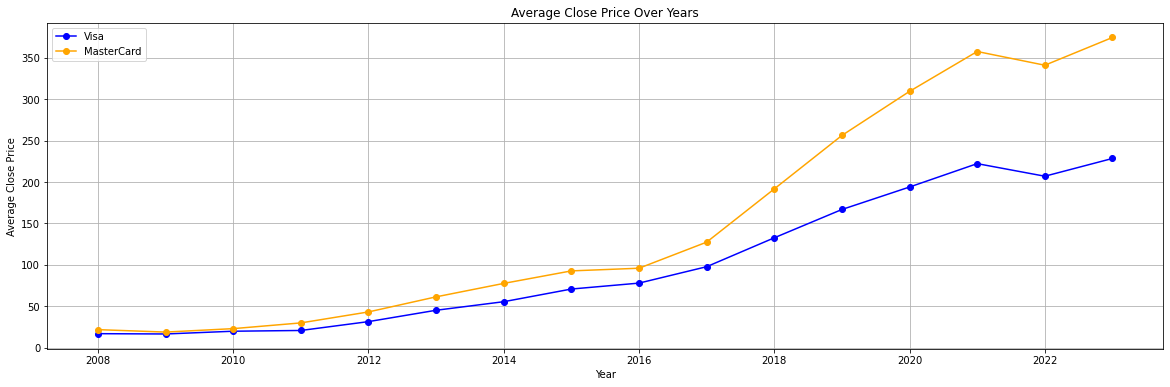

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'V' and 'Ma' are your dataframes

# Group the data by year and calculate the average 'Close' values for Visa and MasterCard
V['Date'] = pd.to_datetime(V['Date'])
Ma['Date'] = pd.to_datetime(Ma['Date'])
V = V.assign(year=V['Date'].dt.year)
Ma = Ma.assign(year=Ma['Date'].dt.year)
v_grouped = V.groupby('year')['Close'].mean()
ma_grouped = Ma.groupby('year')['Close'].mean()

# Plot the data using a line plot
fig, axes = plt.subplots(1, figsize=(20, 6))

v_line = v_grouped.plot(kind='line', ax=axes, color='blue', marker='o', label='Visa')
ma_line = ma_grouped.plot(kind='line', ax=axes, color='orange', marker='o', label='MasterCard')

# Add the legend
plt.legend(loc='upper left')
plt.title('Average Close Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.grid(True)
plt.show()


As we can see there is a diffrent between Master card to Visa. MasterCard's stock price is higher than Visa's since 2010.

### Event Impact:
I wanted to visualize stocks prices for 3 years only - 2008, 2020 and 2022. There are 3 key events that happened and which I would like to explore.

2008 - The year when the company started its IPO. Everytime I look at any company perfomance at the start of its IPO I notice that prices are increasing for the first week or two and then drops down immediately.I wanted to see whether Visa is an exception.

**An initial public offering (IPO) refers to the process of offering shares of a private corporation to the public in a new stock issuance for the first time. An IPO allows a company to raise equity capital from public investors.** 

2020 - COVID crisis. It hurt most companies' stocks prices and I wanted to look at the Visas' and Mastercards' perfomance during this hard times.

2022 - Russian Invasion to Ukraine.Due to the sanctions to Russia, Visa and Mastercard left the Russian market and as a result lost a lot of customers. I wanted to look at the stocks' perfomance and how the market reacted on this. 

To create three line plots for the years 2008, 2020, and 2022, where the x-axis shows the months, and the y-axis shows the close price,I need to do this steps:

1.Filter the data for each specific year (2008, 2020, and 2022). 

2.Calculate the month from the 'Date' column. 

3.Group the data by month and calculate the adj close price for each month.

4.Create three separate line plots for each year using Matplotlib.

[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


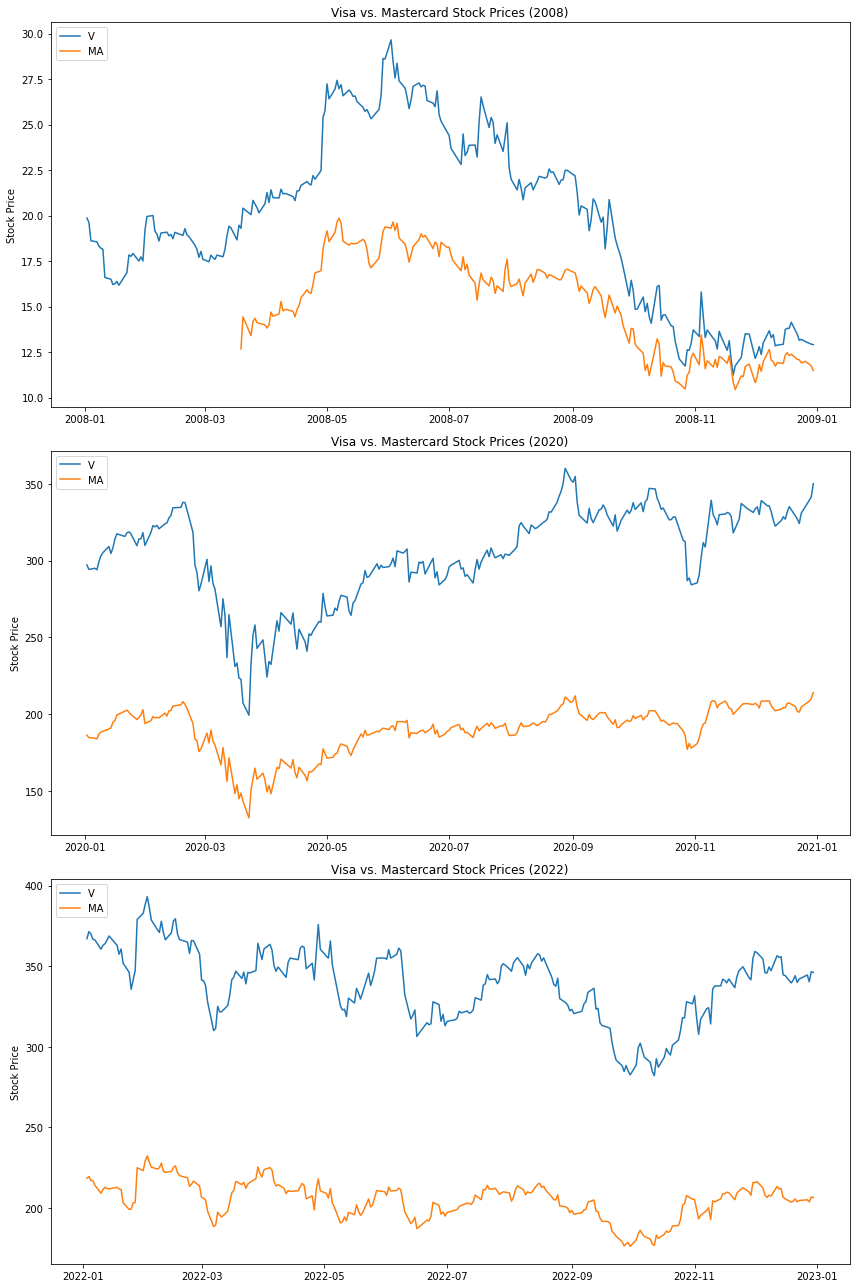

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Define the ticker symbols for Visa and Mastercard
ticker_symbols = ['V', 'MA']  # V for Visa, MA for Mastercard

# Fetch historical stock price data for Visa and Mastercard for the specified time periods
start_date_2008 = '2008-01-01'
end_date_2008 = '2008-12-31'

start_date_2020 = '2020-01-01'
end_date_2020 = '2020-12-31'

start_date_2022 = '2022-01-01'
end_date_2022 = '2022-12-31'

# Fetch data for each specific year
stock_data_2008 = yf.download(ticker_symbols, start=start_date_2008, end=end_date_2008)
stock_data_2020 = yf.download(ticker_symbols, start=start_date_2020, end=end_date_2020)
stock_data_2022 = yf.download(ticker_symbols, start=start_date_2022, end=end_date_2022)

# Create subplots for each year
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot the stock prices for Visa and Mastercard for the year 2008
axs[0].plot(stock_data_2008.index, stock_data_2008['Adj Close'])
axs[0].set_title('Visa vs. Mastercard Stock Prices (2008)')
axs[0].set_ylabel('Stock Price')
axs[0].legend(ticker_symbols, loc='upper left')

# Plot the stock prices for Visa and Mastercard for the year 2020
axs[1].plot(stock_data_2020.index, stock_data_2020['Adj Close'])
axs[1].set_title('Visa vs. Mastercard Stock Prices (2020)')
axs[1].set_ylabel('Stock Price')
axs[1].legend(ticker_symbols, loc='upper left')

# Plot the stock prices for Visa and Mastercard for the year 2022
axs[2].plot(stock_data_2022.index, stock_data_2022['Adj Close'])
axs[2].set_title('Visa vs. Mastercard Stock Prices (2022)')
axs[2].set_ylabel('Stock Price')
axs[2].legend(ticker_symbols, loc='upper left')

# Add vertical lines at the end of each month for all subplots
for i, ax in enumerate(axs):
    start_date = [start_date_2008, start_date_2020, start_date_2022][i]
    for month_end in pd.date_range(start=start_date, end=ax.get_xlim()[1], freq='M'):
        ax.axvline(x=month_end, color='gray', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlapping labels

plt.tight_layout()

# Show the subplots
plt.show()


So, let's analyze what do we have here:

2008 - As I already mentioned, Visa went public in March and every company from the public offering faces an incredible growth in share prices and then the market corrects the price. It should also be remembered that the year 2008 marked the peak of the global financial crisis, which was triggered by the collapse of Lehman Brothers in September. It appears that Visas' and mastercards' stock prices did indeed drop after the sale of shares due to the departure of investors.

2020 - Covid was  but the price drop sharply and recovered quite quickly to the price it was before in about 5 months in both companies.

2022 - Russian invasion of Ukraine. Visa and Mastercard both left the Russian market on March and as a result we can see a significant drop in the stock of both companies.

## Comparison with Market Indices: 
I wanted to Compare MasterCard's and Visa's stock performance with broader market indices, such as the S&P 500  to understand how the companies fared in comparison to the overall market.
So, first I need to upload data of s&p500.

In [11]:
# Retrieve historical data for MasterCard,Visa and the S&P 500
mastercard = yf.download("MA", start="2008-01-01", end="2023-12-31")
sp500 = yf.download("^GSPC", start="2008-01-01", end="2023-12-31")
visa=yf.download("V", start="2008-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


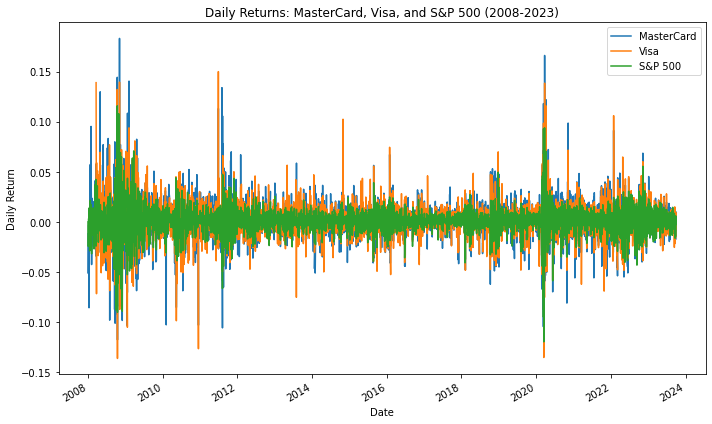

In [12]:
# Calculate daily returns
mastercard['Daily_Return'] = mastercard['Close'].pct_change()
visa['Daily_Return'] = visa['Close'].pct_change()
sp500['Daily_Return'] = sp500['Close'].pct_change()

# Create a line plot to compare daily returns
fig, ax = plt.subplots(figsize=(10, 6))

mastercard['Daily_Return'].plot(kind='line', label='MasterCard', ax=ax)
visa['Daily_Return'].plot(kind='line', label='Visa', ax=ax)
sp500['Daily_Return'].plot(kind='line', label='S&P 500', ax=ax)

ax.set_title('Daily Returns: MasterCard, Visa, and S&P 500 (2008-2023)')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Return')
ax.legend()

plt.tight_layout()
plt.show()


The resulting line plot shows the daily returns for MasterCard, Visa, and the S&P 500, allowing to compare how the two companies' stock performances relate to each other and to the broader market index over the specified time period.

When the lines are above the x-axis (at a positive value), it indicates a positive daily return for that particular day. This means the stock or index increased in value compared to the previous day.
When the lines are below the x-axis (at a negative value), it indicates a negative daily return, meaning the stock or index decreased in value compared to the previous day.
The height of the lines (positive or negative) represents the magnitude of the daily return. A taller line indicates a more significant change.
Comparison:

By comparing the three lines (MasterCard, Visa, and S&P 500),we can observe how the daily returns of the two companies' stocks compare to the overall market represented by the S&P 500.
If the MasterCard and Visa lines move similarly to the S&P 500 line, it suggests that their stock performances were in line with the broader market.
If the MasterCard and Visa lines deviate from the S&P 500 line, it indicates that their stock performances were different from the broader market.
As we can see master card and visa as similarity in the performances of the market.

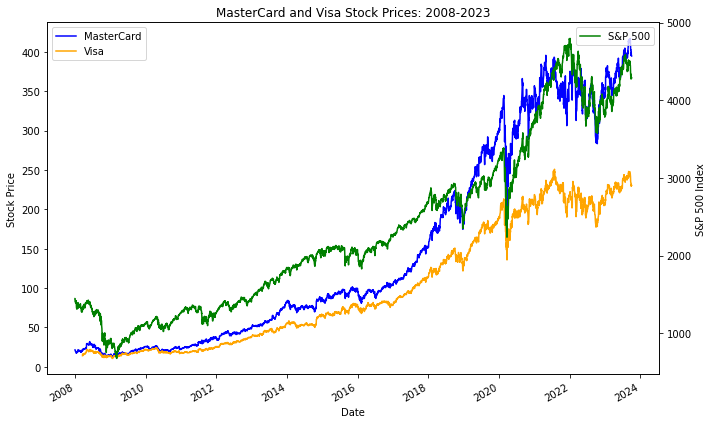

In [13]:
# Create a line plot to compare stock prices
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MasterCard and Visa stock prices
mastercard['Close'].plot(kind='line', label='MasterCard', ax=ax1, color='blue')
visa['Close'].plot(kind='line', label='Visa', ax=ax1, color='orange')

ax1.set_ylabel('Stock Price')
ax1.set_title('MasterCard and Visa Stock Prices: 2008-2023')
ax1.legend(loc='upper left')
# Create a secondary y-axis for the S&P 500 index
ax2 = ax1.twinx()
sp500['Close'].plot(kind='line', label='S&P 500', ax=ax2, color='green')

ax2.set_ylabel('S&P 500 Index')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


As we can see from the graph, there is a match in trends between the market and what is happening with MasterCard and Visa.
When there was a drop due to the corona, it is possible that the shares collapsed like the rest of the market and that there is quite an adjustment to each other

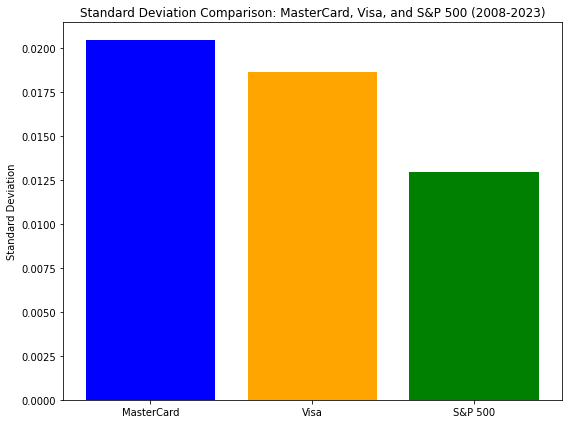

In [14]:
# Calculate daily returns
mastercard['Daily_Return'] = mastercard['Close'].pct_change()
visa['Daily_Return'] = visa['Close'].pct_change()
sp500['Daily_Return'] = sp500['Close'].pct_change()

# Calculate standard deviations of daily returns
mastercard_volatility = mastercard['Daily_Return'].std()
visa_volatility = visa['Daily_Return'].std()
sp500_volatility = sp500['Daily_Return'].std()

# Create a bar plot to compare volatilities
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Standard Deviation values
ax.bar(['MasterCard', 'Visa', 'S&P 500'], [mastercard_volatility, visa_volatility, sp500_volatility], color=['blue', 'orange', 'green'])

ax.set_ylabel('Standard Deviation')
ax.set_title('Standard Deviation Comparison: MasterCard, Visa, and S&P 500 (2008-2023)')

plt.tight_layout()
plt.show()



The standard deviation values you calculated for Mastercard, Visa, and the S&P 500 represent a measure of the volatility or risk associated with the daily returns of these assets over the specified time period (2008-2023).

In summary:

• Mastercard had the highest daily return volatility among the three, with an average daily fluctuation of about 2%.

• Visa had slightly lower daily return volatility, with an average daily fluctuation of about 1.8%.

• The S&P 500, which represents the broader stock market, exhibited an average daily fluctuation of about 1.7%.

As we can see the Lower standard deviation values suggest relatively more stable price movements. These values can help inform investment decisions and risk management strategies.
Mastercard's stock carries the highest level of risk among the three, however, it also demonstrates relative stability and exhibits lower risk compared to the broader market. The S&P 500 basket fund, indeed, is commonly considered to have low risk, which aligns with our findings






# The rate of growth of cumulative returns between MasterCard and Visa

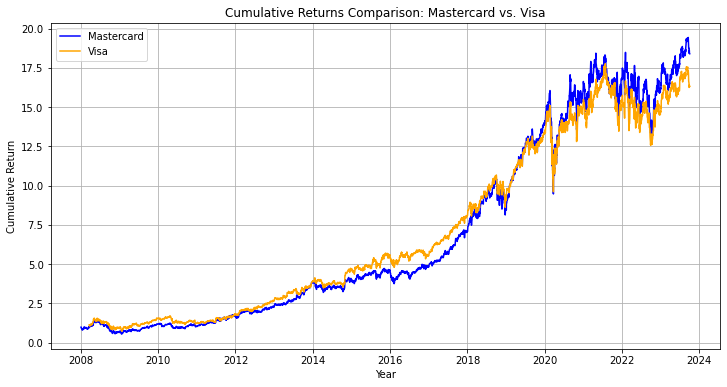

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have calculated daily returns for Mastercard and Visa
mastercard['Cumulative_Return'] = (1 + mastercard['Daily_Return']).cumprod()
visa['Cumulative_Return'] = (1 + visa['Daily_Return']).cumprod()

# Create a line plot to compare cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(mastercard.index, mastercard['Cumulative_Return'], label='Mastercard', color='blue')
plt.plot(visa.index, visa['Cumulative_Return'], label='Visa', color='orange')

plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns Comparison: Mastercard vs. Visa')
plt.legend()
plt.grid(True)
plt.show()


**cumulative return-The total return produced by an investment over a predetermined period. It is the total gain or loss on investment throughout time, regardless of the time involved.
The total return of investment accumulated at the end of the second year would be the cumulative return**

The plot visually compares the rate of growth in the cumulative returns of Mastercard and Visa over time. When analyzing this type of plot, we can draw several conclusions:

Relative Performance: The relative positions of the Mastercard and Visa lines indicate which stock has outperformed the other during specific periods. When Mastercard's line is consistently above Visa's, it suggests that Mastercard outperformed Visa during those timeframes, and vice versa.

Fluctuations: The areas where the lines intersect or show fluctuations suggest shifts in relative performance. For instance, when the lines cross or closely converge, it indicates periods when the two stocks had similar returns, and one did not clearly outperform the other.

Implications:

The fluctuations and intersections between Mastercard and Visa's cumulative return lines can have several implications:

Competitive Dynamics: These fluctuations may reflect changes in competitive dynamics between the two companies or shifts in market sentiment toward them.

Market Conditions: Market conditions, including macroeconomic factors and industry-specific developments, can impact the relative performance of these stocks.

Investment Strategy: For investors, these fluctuations offer opportunities to make strategic investment decisions. Depending on one's investment goals and risk tolerance, they may choose to allocate capital to the stock that is currently outperforming or expect a reversal in performance.

Risk Management: Understanding the relative performance can also aid in risk management strategies, such as diversifying between Mastercard and Visa to reduce portfolio risk.

Conclutions: 
Historically, until the year 2018, Visa consistently outperformed Mastercard in terms of cumulative returns. However, a noticeable shift occurred afterwards.

In recent years, the cumulative returns of Visa and Mastercard have converged closely, with no substantial difference between the two. This suggests that, from a long-term investment perspective, there is little to distinguish between the performance of these two stocks.

Notably, during the period spanning 2015 to 2018, Visa exhibited a slightly higher yield, outperforming Mastercard by approximately one percentage point. This particular period showcased Visa's relative strength and potentially reflects specific market conditions or company-specific factors that favored Visa's performance.

These observations provide historical context for investors and underscore the importance of staying attuned to shifts in relative performance when making investment decisions in the dynamic world of stock markets.
